In [3]:
# install main library YFinance
!pip install yfinance

In [4]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


In [5]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=22
Period for indexes: 1954-04-22 to 2024-04-22 


## **QUESTION #1. Average growth of GDP in 2023**

What is the average growth (in %) of GDP in 2023?

In [6]:
# Real Gross Domestic Product (GDPC1), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [54]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1['avg_gdpc1_us_yoy'] = gdpc1['gdpc1_us_yoy'].rolling(4).mean().round(3)*100
print(gdpc1.tail(7), "\n")

print(f"The average growth of GDP in 2023 is", gdpc1.avg_gdpc1_us_yoy.iloc[-1])

                GDPC1  gdpc1_us_yoy  gdpc1_us_qoq  avg_gdpc1_us_yoy
DATE                                                               
2022-04-01  21708.160      0.018706     -0.001413               3.9
2022-07-01  21851.134      0.017132      0.006586               3.1
2022-10-01  21989.981      0.006517      0.006354               2.0
2023-01-01  22112.329      0.017179      0.005564               1.5
2023-04-01  22225.350      0.023825      0.005111               1.6
2023-07-01  22490.692      0.029269      0.011939               1.9
2023-10-01  22679.255      0.031345      0.008384               2.5 

The average growth of GDP in 2023 is 2.5


### **The average growth of GDP in 2023 is 2.5%**

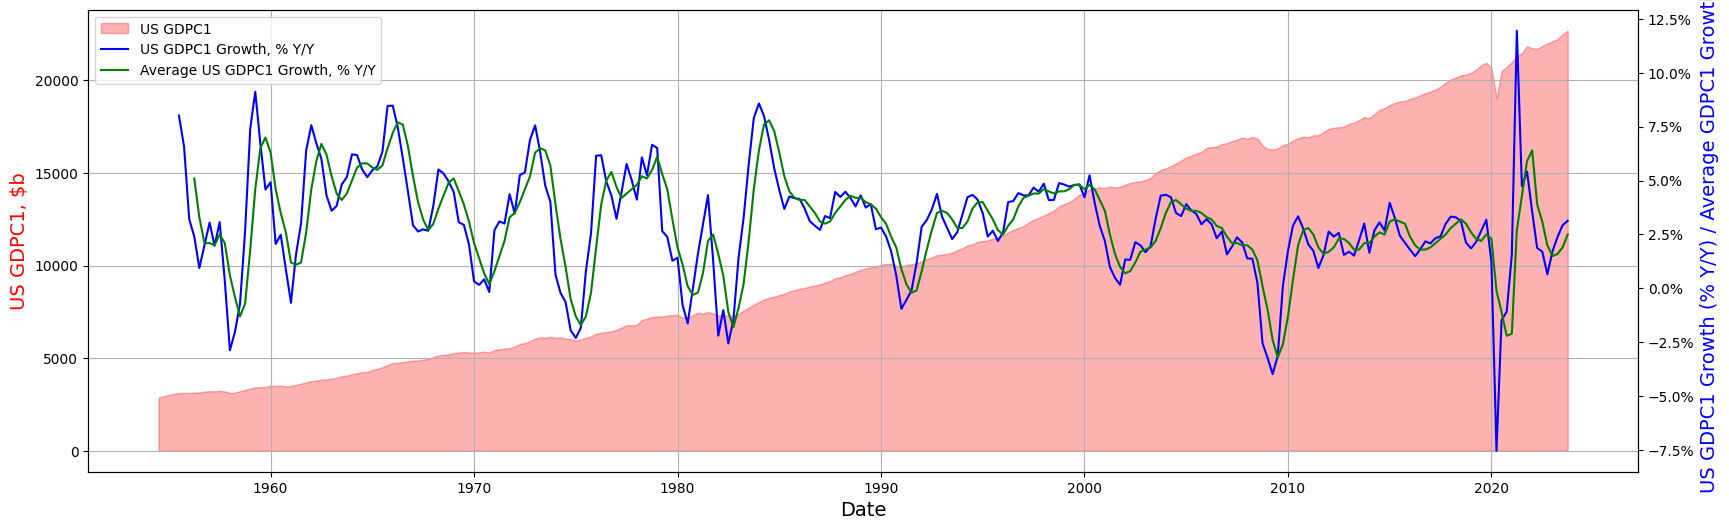

In [112]:
# Visuals GDPC1

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US GDPC1")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", label="US GDPC1 Growth, % Y/Y")
ax2.plot(gdpc1.avg_gdpc1_us_yoy/100, color="green", label="Average US GDPC1 Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US GDPC1, $b", color="red", fontsize=14)
ax2.set_ylabel("US GDPC1 Growth (% Y/Y) / Average GDPC1 Growth", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## **QUESTION #2. Inverse "Treasury Yield"**

**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**

In [9]:
# # "DGS2 and DGS10 interest rates series"
# https://fred.stlouisfed.org/series/DGS2
# https://fred.stlouisfed.org/series/DGS10
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [49]:
dgs2['dgs2_yoy'] = dgs2.DGS2/dgs2.DGS2.shift(12)-1
dgs2['dgs2_mom'] = dgs2.DGS2/dgs2.DGS2.shift(1)-1

dgs2_2000_now = dgs2.loc['2000-01-01':]

dgs2_2000_now

,DGS2,dgs2_yoy,dgs2_mom
DATE,,,
2000-01-03,6.38,0.037398,0.022436
2000-01-04,6.30,0.024390,-0.012539
2000-01-05,6.38,0.027375,0.012698
2000-01-06,6.35,0.022544,-0.004702
2000-01-07,6.31,0.011218,-0.006299
...,...,...,...
2024-04-12,4.88,0.074890,-0.010142
2024-04-15,4.93,0.074074,0.010246
2024-04-16,4.97,NaN,0.008114


In [11]:
dgs10['dgs10_yoy'] = dgs10.DGS10/dgs10.DGS10.shift(12)-1
dgs10['dgs10_mom'] = dgs10.DGS10/dgs10.DGS10.shift(1)-1

dgs10_2000_now = dgs10.loc['2000-01-01':]

dgs10_2000_now

,DGS10,dgs10_yoy,dgs10_mom
DATE,,,
2000-01-03,6.58,0.042789,0.020155
2000-01-04,6.49,0.030159,-0.013678
2000-01-05,6.62,0.040881,0.020031
2000-01-06,6.57,0.029781,-0.007553
2000-01-07,6.52,0.020344,-0.007610
...,...,...,...
2024-04-12,4.50,0.071429,-0.013158
2024-04-15,4.63,0.102381,0.028889
2024-04-16,4.67,NaN,0.008639


In [12]:
dgs2_dgs10 = pd.merge(dgs2_2000_now, dgs10_2000_now, left_index=True, right_index=True, suffixes=('_dgs2', '_dgs10'))[["DGS10", "DGS2"]]

dgs2_dgs10

,DGS10,DGS2
DATE,,
2000-01-03,6.58,6.38
2000-01-04,6.49,6.30
2000-01-05,6.62,6.38
2000-01-06,6.57,6.35
2000-01-07,6.52,6.31
...,...,...
2024-04-12,4.50,4.88
2024-04-15,4.63,4.93
2024-04-16,4.67,4.97


In [51]:
dgs2_dgs10["diff_DGS10_DGS2"] = dgs2_dgs10.DGS10 - dgs2_dgs10.DGS2
min_dgs2_dgs10 = dgs2_dgs10["diff_DGS10_DGS2"].min().round(1)

print(dgs2_dgs10.sort_values("diff_DGS10_DGS2", ascending=True).head(5), "\n")

print(f"The min value of (dgs10-dgs2) since year 2000 (2000-01-01) is {min_dgs2_dgs10} on {dgs2_dgs10['diff_DGS10_DGS2'].idxmin()}")

            DGS10  DGS2  diff_DGS10_DGS2
DATE                                    
2023-07-03   3.86  4.94            -1.08
2023-03-08   3.98  5.05            -1.07
2023-06-30   3.81  4.87            -1.06
2023-03-07   3.97  5.00            -1.03
2023-06-29   3.85  4.87            -1.02 

The min value of (dgs10-dgs2) since year 2000 (2000-01-01) is -1.1 on 2023-07-03 00:00:00


### **The min value of (dgs10-dgs2) since year 2000 (2000-01-01) is -1.1**

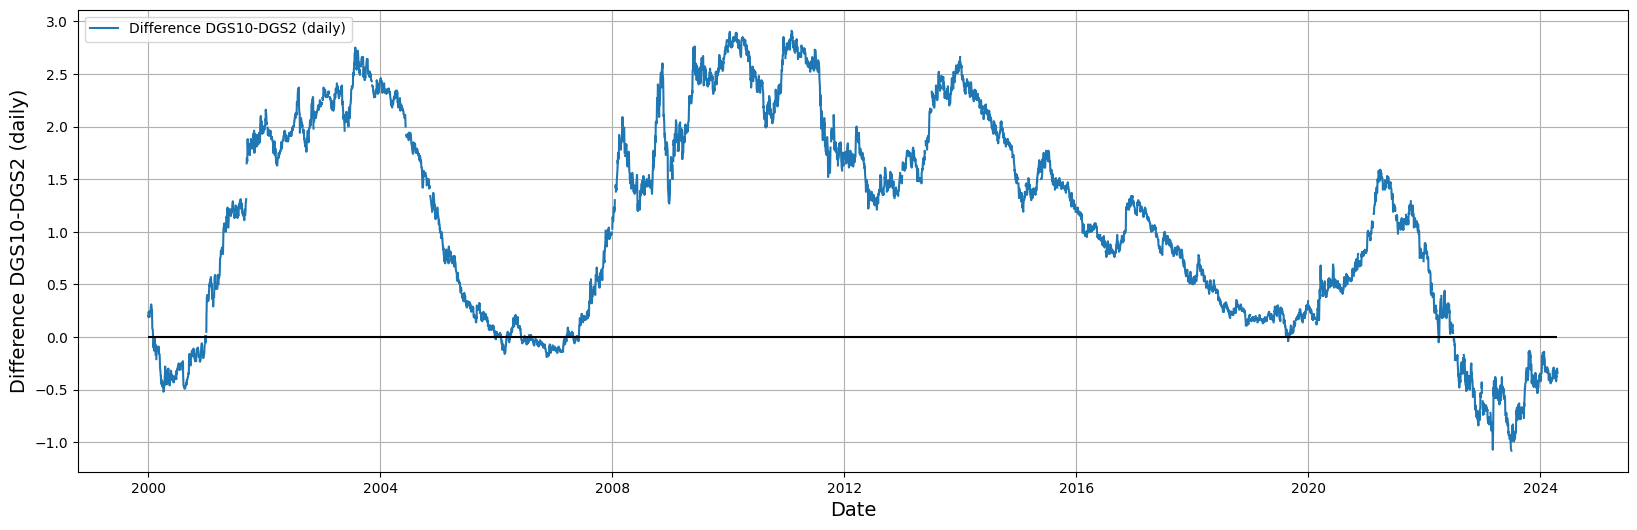

In [119]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.plot(dgs2_dgs10.index, dgs2_dgs10.diff_DGS10_DGS2, label="Difference DGS10-DGS2 (daily)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Difference DGS10-DGS2 (daily)", fontsize=14)
ax.hlines(y=0, xmin=dgs2_dgs10.index[0], xmax=dgs2_dgs10.index[-1], color="black")

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

## **Additional questions**
**What does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?**

An inverted yield curve means that bonds with longer maturities have lower yields than those with shorter maturities. This situation is considered abnormal, as bonds with longer maturities typically offer higher yields to compensate for the increased risk. An inverted yield curve may indicate that investors are skeptical about the economy's dynamic growth in the future, i.e., GDP growth rates may slow down, and business profitability may decline. This curve can be a sign of an impending recession. Considering this signal, regulators may decide to lower interest rates in the economy, which can lead to increased market volatility, increasing the risk of investment losses. Perhaps it's time to adjust the investment strategy to a more cautious and pragmatic approach. It may be worth considering the possibility of acquiring defensive assets.

It is believed that an inverted yield curve is a fairly reliable indicator of an impending economic slowdown or even recession. However, like any other economic indicator, to draw well-founded conclusions, it's essential to supplement the inverted yield curve with other indicators, such as GDP growth data, financial instrument prices (rates), employment rates, and the development of key sectors in the economy, among others.

## **QUESTION #3. Which Index is better recently?**
**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

In [15]:
# SNP500 - SNP Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/%5EGSPC/
SP500_daily = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [16]:
SP500_daily_2019_2024 = SP500_daily[(SP500_daily.index >='2019-04-09') & (SP500_daily.index <='2024-04-09')][["High", "Low"]]

SP500_daily_2019_2024

,High,Low
Date,,
2019-04-09,2886.879883,2873.330078
2019-04-10,2889.709961,2879.129883
2019-04-11,2893.419922,2881.989990
2019-04-12,2910.540039,2898.370117
2019-04-15,2909.600098,2896.479980
...,...,...
2024-04-03,5228.750000,5194.370117
2024-04-04,5256.589844,5146.060059
2024-04-05,5222.180176,5157.209961


In [17]:
# IPC Mexico
# WEB: https://finance.yahoo.com/quote/%5EMXX/
IPC_Mexico_daily = yf.download(tickers = "^MXX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [18]:
IPC_Mexico_daily_2019_2024 = IPC_Mexico_daily[(IPC_Mexico_daily.index >='2019-04-09') & (IPC_Mexico_daily.index <='2024-04-09')][["High", "Low"]]

IPC_Mexico_daily_2019_2024

,High,Low
Date,,
2019-04-09,45346.828125,44854.531250
2019-04-10,45219.410156,44850.109375
2019-04-11,44966.500000,44373.488281
2019-04-12,44888.699219,44534.378906
2019-04-15,44900.929688,44347.531250
...,...,...
2024-04-03,58086.421875,57300.109375
2024-04-04,58219.500000,57514.179688
2024-04-05,58227.839844,57678.609375


In [19]:
SP500_IPC_Mexico = pd.merge(SP500_daily_2019_2024, IPC_Mexico_daily_2019_2024, on='Date', suffixes=('_SP500', '_IPC_Mexico'))

SP500_IPC_Mexico

,High_SP500,Low_SP500,High_IPC_Mexico,Low_IPC_Mexico
Date,,,,
2019-04-09,2886.879883,2873.330078,45346.828125,44854.531250
2019-04-10,2889.709961,2879.129883,45219.410156,44850.109375
2019-04-11,2893.419922,2881.989990,44966.500000,44373.488281
2019-04-12,2910.540039,2898.370117,44888.699219,44534.378906
2019-04-15,2909.600098,2896.479980,44900.929688,44347.531250
...,...,...,...,...
2024-04-03,5228.750000,5194.370117,58086.421875,57300.109375
2024-04-04,5256.589844,5146.060059,58219.500000,57514.179688
2024-04-05,5222.180176,5157.209961,58227.839844,57678.609375


In [69]:
SP500_5Y_growth = ((SP500_IPC_Mexico.iloc[-1, 0] / SP500_IPC_Mexico.iloc[0, 1] - 1)*100).round()
print("5Y growth for S&P500, in %, is:", SP500_5Y_growth, "%", "\n")

IPC_Mexico_5Y_growth = ((SP500_IPC_Mexico.iloc[-1, 2] / SP500_IPC_Mexico.iloc[0, 3] - 1)*100).round()
print("5Y growth for IPC Mexico, in %, is:", IPC_Mexico_5Y_growth, "%")

5Y growth for S&P500, in %, is: 82.0 % 

5Y growth for IPC Mexico, in %, is: 30.0 %


### **5Y growth for S&P500, in %, is: 82.0 %**

## **Additional questions**

**Think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?**

In [82]:
# STI Index (Straits Times Index) - Singapore stock market index. Currency in SGD
# WEB: https://finance.yahoo.com/quote/%5ESTI/
STI_monthly = yf.download(tickers = "^STI",
                     period = "max",
                     interval = "1mo")
STI_monthly_Close = STI_monthly[["Close"]]
STI_monthly_Close["Close_1Y"] = ((STI_monthly_Close["Close"]/STI_monthly_Close["Close"].shift(12) - 1)*100).round(1)
STI_monthly_Close["Close_5Y"] = ((STI_monthly_Close["Close"]/STI_monthly_Close["Close"].shift(60) - 1)*100).round(1)
STI_monthly_Close["Close_10Y"] = ((STI_monthly_Close["Close"]/STI_monthly_Close["Close"].shift(120) - 1)*100).round(1)
STI_monthly_Close["Close_20Y"] = ((STI_monthly_Close["Close"]/STI_monthly_Close["Close"].shift(240) - 1)*100).round(1)

STI_monthly_Close_2010_2024 = STI_monthly_Close[(STI_monthly_Close.index >='2010-01-01') & (STI_monthly_Close.index <='2024-12-31')][["Close_1Y", "Close_5Y", "Close_10Y", "Close_20Y"]]

STI_monthly_Close_2010_2024

[*********************100%%**********************]  1 of 1 completed
<ipython-input-82-65ce99835ea7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STI_monthly_Close["Close_1Y"] = ((STI_monthly_Close["Close"]/STI_monthly_Close["Close"].shift(12) - 1)*100).round(1)
<ipython-input-82-65ce99835ea7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STI_monthly_Close["Close_5Y"] = ((STI_monthly_Close["Close"]/STI_monthly_Close["Close"].shift(60) - 1)*100).round(1)
<ipython-input-82-65ce99835ea7>:9: SettingWithC

,Close_1Y,Close_5Y,Close_10Y,Close_20Y
Date,,,,
2010-01-01,57.2,31.0,23.1,81.2
2010-02-01,72.5,29.8,29.7,77.5
2010-03-01,69.9,34.8,35.4,82.6
2010-04-01,54.9,40.0,37.5,104.0
2010-05-01,18.2,27.3,53.3,77.2
...,...,...,...,...
2023-12-01,-0.3,5.6,2.3,83.6
2024-01-01,-6.3,-1.2,4.2,70.6
2024-02-01,-3.7,-2.2,1.0,66.4


In [89]:
# Calculate the average values of 1Y, 5Y, 10Y and 20Y for STI index for 2010-2024
STI_monthly_Close_2010_2024_1Y = STI_monthly_Close_2010_2024.iloc[:, 0].sum()/len(STI_monthly_Close_2010_2024)
STI_monthly_Close_2010_2024_5Y = STI_monthly_Close_2010_2024.iloc[:, 1].sum()/len(STI_monthly_Close_2010_2024)
STI_monthly_Close_2010_2024_10Y = STI_monthly_Close_2010_2024.iloc[:, 2].sum()/len(STI_monthly_Close_2010_2024)
STI_monthly_Close_2010_2024_20Y = STI_monthly_Close_2010_2024.iloc[:, 3].sum()/len(STI_monthly_Close_2010_2024)

print("STI_monthly_Close_2010_2024_1Y (CAGR) for 2010-2024 is:", STI_monthly_Close_2010_2024_1Y.round(1), "%")
print("STI_monthly_Close_2010_2024_5Y for 2010-2024 is:", STI_monthly_Close_2010_2024_5Y.round(1), "%")
print("STI_monthly_Close_2010_2024_10Y for 2010-2024 is:", STI_monthly_Close_2010_2024_10Y.round(1), "%")
print("STI_monthly_Close_2010_2024_20Y for 2010-2024 is:", STI_monthly_Close_2010_2024_20Y.round(1), "%")

STI_monthly_Close_2010_2024_1Y (CAGR) for 2010-2024 is: 3.4 %
STI_monthly_Close_2010_2024_5Y for 2010-2024 is: 8.1 %
STI_monthly_Close_2010_2024_10Y for 2010-2024 is: 37.6 %
STI_monthly_Close_2010_2024_20Y for 2010-2024 is: 84.3 %


### **For STI index CAGR amount to 3.4 %**

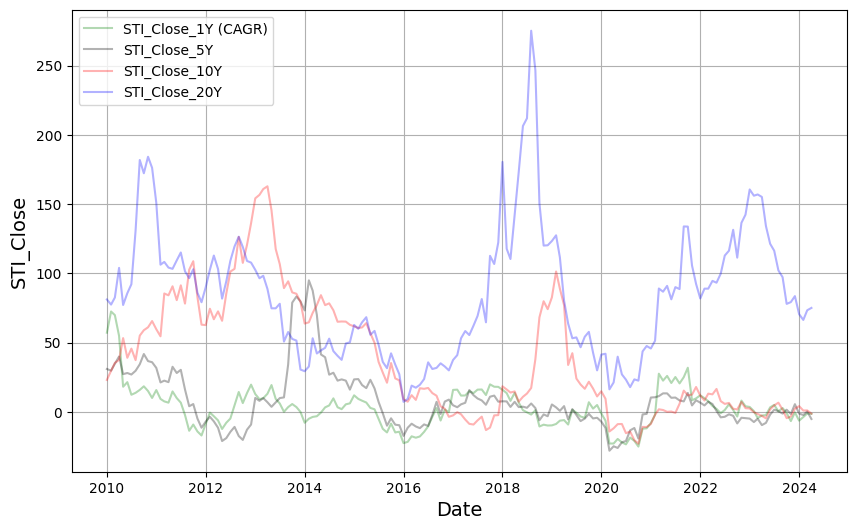

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)

# Plotting stock curves
ax.plot(STI_monthly_Close_2010_2024.index, STI_monthly_Close_2010_2024["Close_1Y"], color="green", alpha=0.3, label="STI_Close_1Y (CAGR)")
ax.plot(STI_monthly_Close_2010_2024.index, STI_monthly_Close_2010_2024["Close_5Y"], color="black", alpha=0.3, label="STI_Close_5Y")
ax.plot(STI_monthly_Close_2010_2024.index, STI_monthly_Close_2010_2024["Close_10Y"], color="red", alpha=0.3, label="STI_Close_10Y")
ax.plot(STI_monthly_Close_2010_2024.index, STI_monthly_Close_2010_2024["Close_20Y"], color="blue", alpha=0.3, label="STI_Close_20Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("STI_Close", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [83]:
# FTSE Index (Financial Times Stock Exchange 100 Index), London (UK). Currency in GBP
# WEB: https://finance.yahoo.com/quote/%5EFTSE/
FTSE_monthly = yf.download(tickers = "^FTSE",
                     period = "max",
                     interval = "1mo")
FTSE_monthly_Close = FTSE_monthly[["Close"]]
FTSE_monthly_Close["Close_1Y"] = ((FTSE_monthly_Close["Close"]/FTSE_monthly_Close["Close"].shift(12) - 1)*100).round(1)
FTSE_monthly_Close["Close_5Y"] = ((FTSE_monthly_Close["Close"]/FTSE_monthly_Close["Close"].shift(60) - 1)*100).round(1)
FTSE_monthly_Close["Close_10Y"] = ((FTSE_monthly_Close["Close"]/FTSE_monthly_Close["Close"].shift(120) - 1)*100).round(1)
FTSE_monthly_Close["Close_20Y"] = ((FTSE_monthly_Close["Close"]/FTSE_monthly_Close["Close"].shift(240) - 1)*100).round(1)

FTSE_monthly_Close_2010_2024 = FTSE_monthly_Close[(FTSE_monthly_Close.index >='2010-01-01') & (FTSE_monthly_Close.index <='2024-12-31')][["Close_1Y", "Close_5Y", "Close_10Y", "Close_20Y"]]

FTSE_monthly_Close_2010_2024

[*********************100%%**********************]  1 of 1 completed
<ipython-input-83-5d36aefc2095>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FTSE_monthly_Close["Close_1Y"] = ((FTSE_monthly_Close["Close"]/FTSE_monthly_Close["Close"].shift(12) - 1)*100).round(1)
<ipython-input-83-5d36aefc2095>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FTSE_monthly_Close["Close_5Y"] = ((FTSE_monthly_Close["Close"]/FTSE_monthly_Close["Close"].shift(60) - 1)*100).round(1)
<ipython-input-83-5d36aefc2095>:9: Settin

,Close_1Y,Close_5Y,Close_10Y,Close_20Y
Date,,,,
2010-01-01,25.0,6.9,-17.2,122.0
2010-02-01,39.8,7.8,-14.1,137.4
2010-03-01,44.7,16.0,-13.2,152.7
2010-04-01,30.9,15.7,-12.2,164.0
2010-05-01,17.4,4.5,-18.4,121.2
...,...,...,...,...
2023-12-01,3.8,14.9,14.6,72.7
2024-01-01,-1.8,9.5,17.2,73.8
2024-02-01,-3.1,7.8,12.0,69.8


In [90]:
# Calculate the average values of 1Y, 5Y, 10Y and 20Y for FTSE index for 2010-2024
FTSE_monthly_Close_2010_2024_1Y = FTSE_monthly_Close_2010_2024.iloc[:, 0].sum()/len(FTSE_monthly_Close_2010_2024)
FTSE_monthly_Close_2010_2024_5Y = FTSE_monthly_Close_2010_2024.iloc[:, 1].sum()/len(FTSE_monthly_Close_2010_2024)
FTSE_monthly_Close_2010_2024_10Y = FTSE_monthly_Close_2010_2024.iloc[:, 2].sum()/len(FTSE_monthly_Close_2010_2024)
FTSE_monthly_Close_2010_2024_20Y = FTSE_monthly_Close_2010_2024.iloc[:, 3].sum()/len(FTSE_monthly_Close_2010_2024)

print("FTSE_monthly_Close_2010_2024_1Y (CAGR) for 2010-2024 is:", FTSE_monthly_Close_2010_2024_1Y.round(1), "%")
print("FTSE_monthly_Close_2010_2024_5Y for 2010-2024 is:", FTSE_monthly_Close_2010_2024_5Y.round(1), "%")
print("FTSE_monthly_Close_2010_2024_10Y for 2010-2024 is:", FTSE_monthly_Close_2010_2024_10Y.round(1), "%")
print("FTSE_monthly_Close_2010_2024_20Y for 2010-2024 is:", FTSE_monthly_Close_2010_2024_20Y.round(1), "%")

FTSE_monthly_Close_2010_2024_1Y (CAGR) for 2010-2024 is: 4.2 %
FTSE_monthly_Close_2010_2024_5Y for 2010-2024 is: 10.9 %
FTSE_monthly_Close_2010_2024_10Y for 2010-2024 is: 25.6 %
FTSE_monthly_Close_2010_2024_20Y for 2010-2024 is: 77.1 %


### **For the FTSE index CAGR amounts to 4.2 %**

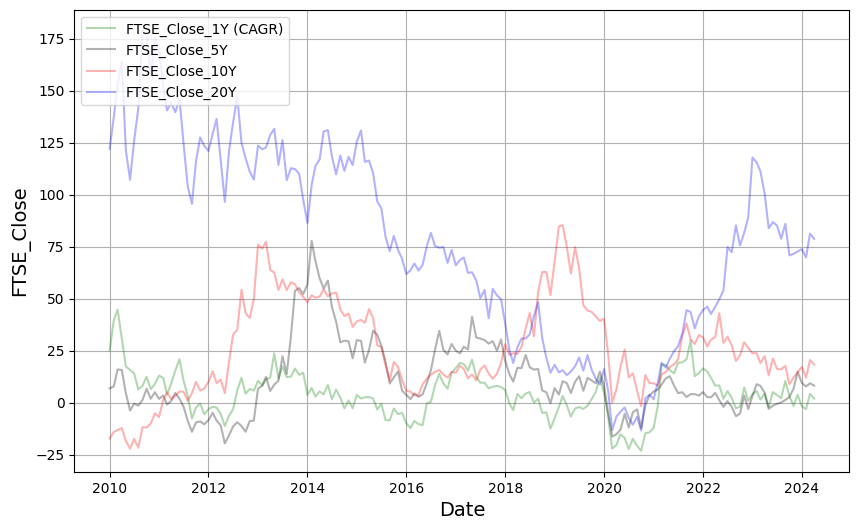

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)

# Plotting stock curves
ax.plot(FTSE_monthly_Close_2010_2024.index, FTSE_monthly_Close_2010_2024["Close_1Y"], color="green", alpha=0.3, label="FTSE_Close_1Y (CAGR)")
ax.plot(FTSE_monthly_Close_2010_2024.index, FTSE_monthly_Close_2010_2024["Close_5Y"], color="black", alpha=0.3, label="FTSE_Close_5Y")
ax.plot(FTSE_monthly_Close_2010_2024.index, FTSE_monthly_Close_2010_2024["Close_10Y"], color="red", alpha=0.3, label="FTSE_Close_10Y")
ax.plot(FTSE_monthly_Close_2010_2024.index, FTSE_monthly_Close_2010_2024["Close_20Y"], color="blue", alpha=0.3, label="FTSE_Close_20Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("FTSE_Close", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

## **QUESTION #4. 52-weeks range ratio (2023) for the selected stocks**
**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**

In [21]:
# 2222.SR - Saudi Arabian Oil Company. Currency in SAR
# WEB: https://finance.yahoo.com/quote/2222.SR/
SR2222 = yf.download(tickers = "2222.SR",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [22]:
SR2222_Adj_Close = SR2222[["Adj Close"]][(SR2222.index >= '2023-01-01') & (SR2222.index <= '2023-12-31')]
SR2222_Adj_Close

,Adj Close
Date,
2023-01-01,28.475792
2023-01-02,28.256071
2023-01-03,28.256071
2023-01-04,27.860577
2023-01-05,27.728745
...,...
2023-12-25,32.927525
2023-12-26,32.877789
2023-12-27,32.977268


In [23]:
SR2222_Adj_Close_min = SR2222_Adj_Close["Adj Close"].min()
SR2222_Adj_Close_max = SR2222_Adj_Close["Adj Close"].max()

Ratio_SR2222_Adj_Close = ((SR2222_Adj_Close_max - SR2222_Adj_Close_min) / SR2222_Adj_Close_max).round(2)
print("The Adj.Close ratio for 2222.SR is", Ratio_SR2222_Adj_Close)

The Adj.Close ratio for 2222.SR is 0.21


In [24]:
# BRK-B - Berkshire Hathaway Inc. Currency in USD
# WEB: https://finance.yahoo.com/quote/BRK-B/
BRKB = yf.download(tickers = "BRK-B",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [25]:
BRKB_Adj_Close = BRKB[["Adj Close"]][(BRKB.index >= '2023-01-01') & (BRKB.index <= '2023-12-31')]
BRKB_Adj_Close

,Adj Close
Date,
2023-01-03,309.910004
2023-01-04,314.549988
2023-01-05,312.899994
2023-01-06,318.690002
2023-01-09,315.529999
...,...
2023-12-22,356.470001
2023-12-26,356.829987
2023-12-27,356.950012


In [26]:
BRKB_Adj_Close_min = BRKB_Adj_Close["Adj Close"].min()
BRKB_Adj_Close_max = BRKB_Adj_Close["Adj Close"].max()

Ratio_BRKB_Adj_Close = ((BRKB_Adj_Close_max - BRKB_Adj_Close_min) / BRKB_Adj_Close_max).round(2)
print("The Adj.Close ratio for BRK-B is", Ratio_BRKB_Adj_Close)

The Adj.Close ratio for BRK-B is 0.21


In [27]:
# AAPL - Apple Inc. Currency in USD
# WEB: https://finance.yahoo.com/quote/AAPL/
AAPL = yf.download(tickers = "AAPL",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [28]:
AAPL_Adj_Close = AAPL[["Adj Close"]][(AAPL.index >= '2023-01-01') & (AAPL.index <= '2023-12-31')]
AAPL_Adj_Close

,Adj Close
Date,
2023-01-03,124.216301
2023-01-04,125.497505
2023-01-05,124.166641
2023-01-06,128.735229
2023-01-09,129.261612
...,...
2023-12-22,193.353287
2023-12-26,192.803986
2023-12-27,192.903839


In [29]:
AAPL_Adj_Close_min = AAPL_Adj_Close["Adj Close"].min()
AAPL_Adj_Close_max = AAPL_Adj_Close["Adj Close"].max()

Ratio_AAPL_Adj_Close = ((AAPL_Adj_Close_max - AAPL_Adj_Close_min) / AAPL_Adj_Close_max).round(2)
print("The Adj.Close ratio for AAPL is", Ratio_AAPL_Adj_Close)

The Adj.Close ratio for AAPL is 0.37


In [30]:
# MSFT - Microsoft Corporation. Currency in USD
# WEB: https://finance.yahoo.com/quote/MSFT/
MSFT = yf.download(tickers = "MSFT",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [31]:
MSFT_Adj_Close = MSFT[["Adj Close"]][(MSFT.index >= '2023-01-01') & (MSFT.index <= '2023-12-31')]
MSFT_Adj_Close

,Adj Close
Date,
2023-01-03,237.035995
2023-01-04,226.667297
2023-01-05,219.949371
2023-01-06,222.541550
2023-01-09,224.708313
...,...
2023-12-22,373.888580
2023-12-26,373.968445
2023-12-27,373.379547


In [32]:
MSFT_Adj_Close_min = MSFT_Adj_Close["Adj Close"].min()
MSFT_Adj_Close_max = MSFT_Adj_Close["Adj Close"].max()

Ratio_MSFT_Adj_Close = ((MSFT_Adj_Close_max - MSFT_Adj_Close_min) / MSFT_Adj_Close_max).round(2)
print("The Adj.Close ratio for MSFT is", Ratio_MSFT_Adj_Close)

The Adj.Close ratio for MSFT is 0.42


In [33]:
# GOOG - Alphabet Inc. Currency in USD
# WEB: https://finance.yahoo.com/quote/GOOG/
GOOG = yf.download(tickers = "GOOG",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [34]:
GOOG_Adj_Close = GOOG[["Adj Close"]][(GOOG.index >= '2023-01-01') & (GOOG.index <= '2023-12-31')]
GOOG_Adj_Close

,Adj Close
Date,
2023-01-03,89.699997
2023-01-04,88.709999
2023-01-05,86.769997
2023-01-06,88.160004
2023-01-09,88.800003
...,...
2023-12-22,142.720001
2023-12-26,142.820007
2023-12-27,141.440002


In [35]:
GOOG_Adj_Close_min = GOOG_Adj_Close["Adj Close"].min()
GOOG_Adj_Close_max = GOOG_Adj_Close["Adj Close"].max()

Ratio_GOOG_Adj_Close = ((GOOG_Adj_Close_max - GOOG_Adj_Close_min) / GOOG_Adj_Close_max).round(2)
print("The Adj.Close ratio for GOOG is", Ratio_GOOG_Adj_Close)

The Adj.Close ratio for GOOG is 0.39


In [36]:
# JPM - JPMorgan Chase & Co. Currency in USD
# WEB: https://finance.yahoo.com/quote/JPM/
JPM = yf.download(tickers = "JPM",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [37]:
JPM_Adj_Close = JPM[["Adj Close"]][(JPM.index >= '2023-01-01') & (JPM.index <= '2023-12-31')]
JPM_Adj_Close

,Adj Close
Date,
2023-01-03,129.648483
2023-01-04,130.857468
2023-01-05,130.828476
2023-01-06,133.331970
2023-01-09,132.781006
...,...
2023-12-22,165.409225
2023-12-26,166.387451
2023-12-27,167.385437


In [38]:
JPM_Adj_Close_min = JPM_Adj_Close["Adj Close"].min()
JPM_Adj_Close_max = JPM_Adj_Close["Adj Close"].max()

Ratio_JPM_Adj_Close = ((JPM_Adj_Close_max - JPM_Adj_Close_min) / JPM_Adj_Close_max).round(2)
print("The Adj.Close ratio for JPM is", Ratio_JPM_Adj_Close)

The Adj.Close ratio for JPM is 0.28


In [39]:
list_ratios = [Ratio_SR2222_Adj_Close, Ratio_BRKB_Adj_Close, Ratio_AAPL_Adj_Close, Ratio_MSFT_Adj_Close, Ratio_GOOG_Adj_Close, Ratio_JPM_Adj_Close]
print("The largest Adj. Close ratio between the 6 stocks is", max(list_ratios))

The largest Adj. Close ratio between the 6 stocks is 0.42


### **The largest Adj. Close ratio between the 6 stocks is 0.42**

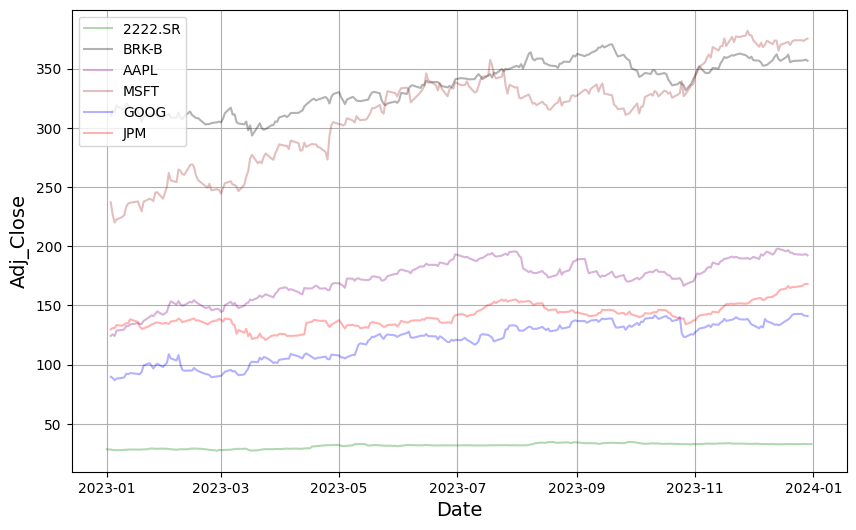

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)

# Plotting stock curves
ax.plot(SR2222_Adj_Close.index, SR2222_Adj_Close["Adj Close"], color="green", alpha=0.3, label="2222.SR")
ax.plot(BRKB_Adj_Close.index, BRKB_Adj_Close["Adj Close"], color="black", alpha=0.3, label="BRK-B")
ax.plot(AAPL_Adj_Close.index, AAPL_Adj_Close["Adj Close"], color="purple", alpha=0.3, label="AAPL")
ax.plot(MSFT_Adj_Close.index, MSFT_Adj_Close["Adj Close"], color="brown", alpha=0.3, label="MSFT")
ax.plot(GOOG_Adj_Close.index, GOOG_Adj_Close["Adj Close"], color="blue", alpha=0.3, label="GOOG")
ax.plot(JPM_Adj_Close.index, JPM_Adj_Close["Adj Close"], color="red", alpha=0.3, label="JPM")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Adj_Close", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

**The range ratio indicates the volatility of an asset's value, meaning that the closer the ratio is to 1, the higher the volatility and the higher the risk of investing. This fact should be taken into account based on the chosen investment strategy. Additionally, changes in the ratio and its approach to 0 or 1 may indicate a trend reversal, so such changes should be considered when setting stop-loss parameters, as this will allow you to catch a trend reversal and sell the asset or use a protective mechanism.**

## **QUESTION #5. Dividend Yield**
**Find the largest dividend yield for the same set of stocks**

In [41]:
import yfinance as yf
SR2222_dividends = yf.Ticker('2222.SR').get_actions().tail(7)
SR2222_dividends = SR2222_dividends.loc["2023-01-01":"2023-12-31"]
print(SR2222_dividends, "\n")

SR2222_dividends_sum = SR2222_dividends['Dividends'].sum()
print("The total dividends for 2222.SR in 2023 amount to:", SR2222_dividends_sum, "\n")

SR2222_Adj_Close_final = SR2222_Adj_Close.iloc[-1, 0]
print("The closing price for 2222.SR on the last trading day of the year 2023 is:", SR2222_Adj_Close_final, "\n")

SR2222_dividends_yield = (SR2222_dividends_sum/SR2222_Adj_Close_final * 100).round(1)
print("The dividend yield for 2222.SR in year 2023 is:", SR2222_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-03-15 00:00:00+03:00   0.302364           0.0
2023-05-09 00:00:00+03:00   0.000000           1.1
2023-05-17 00:00:00+03:00   0.302400           0.0
2023-09-11 00:00:00+03:00   0.153000           0.0
2023-11-15 00:00:00+03:00   0.153000           0.0 

The total dividends for 2222.SR in 2023 amount to: 0.9107640000000001 

The closing price for 2222.SR on the last trading day of the year 2023 is: 32.82804870605469 

The dividend yield for 2222.SR in year 2023 is: 2.8 %


In [42]:
BRKB_dividends = yf.Ticker('BRK-B').get_actions().tail(7)
BRKB_dividends = BRKB_dividends.loc["2023-01-01":"2023-12-31"]
print(BRKB_dividends, "\n")

BRKB_dividends_sum = BRKB_dividends['Dividends'].sum()
print("The total dividends for BRK-B in 2023 amount to:", BRKB_dividends_sum, "\n")

BRKB_Adj_Close_final = BRKB_Adj_Close.iloc[-1, 0]
print("The closing price for BRK-B on the last trading day of the year 2023 is:", BRKB_Adj_Close_final, "\n")

BRKB_dividends_yield = (BRKB_dividends_sum/BRKB_Adj_Close_final * 100).round(1)
print("The dividend yield for BRK-B in year 2023 is:", BRKB_dividends_yield, "%")


Empty DataFrame
Columns: [Dividends, Stock Splits]
Index: [] 

The total dividends for BRK-B in 2023 amount to: 0.0 

The closing price for BRK-B on the last trading day of the year 2023 is: 356.6600036621094 

The dividend yield for BRK-B in year 2023 is: 0.0 %


In [43]:
MSFT_dividends = yf.Ticker('MSFT').get_actions().tail(7)
MSFT_dividends = MSFT_dividends.loc["2023-01-01":"2023-12-31"]
print(MSFT_dividends, "\n")

MSFT_dividends_sum = MSFT_dividends['Dividends'].sum()
print("The total dividends for MSFT in 2023 amount to:", MSFT_dividends_sum, "\n")

MSFT_Adj_Close_final = MSFT_Adj_Close.iloc[-1, 0]
print("The closing price for MSFT on the last trading day of the year 2023 is:", MSFT_Adj_Close_final, "\n")

MSFT_dividends_yield = (MSFT_dividends_sum/MSFT_Adj_Close_final * 100).round(1)
print("The dividend yield for MSFT in year 2023 is:", MSFT_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-02-15 00:00:00-05:00       0.68           0.0
2023-05-17 00:00:00-04:00       0.68           0.0
2023-08-16 00:00:00-04:00       0.68           0.0
2023-11-15 00:00:00-05:00       0.75           0.0 

The total dividends for MSFT in 2023 amount to: 2.79 

The closing price for MSFT on the last trading day of the year 2023 is: 375.34588623046875 

The dividend yield for MSFT in year 2023 is: 0.7 %


In [44]:
AAPL_dividends = yf.Ticker('AAPL').get_actions().tail(7)
AAPL_dividends = AAPL_dividends.loc["2023-01-01":"2023-12-31"]
print(AAPL_dividends, "\n")

AAPL_dividends_sum = AAPL_dividends['Dividends'].sum()
print("The total dividends for AAPL in 2023 amount to:", AAPL_dividends_sum, "\n")

AAPL_Adj_Close_final = AAPL_Adj_Close.iloc[-1, 0]
print("The closing price for AAPL on the last trading day of the year 2023 is:", AAPL_Adj_Close_final, "\n")

AAPL_dividends_yield = (AAPL_dividends_sum/AAPL_Adj_Close_final * 100).round(1)
print("The dividend yield for AAPL in year 2023 is:", AAPL_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-02-10 00:00:00-05:00       0.23           0.0
2023-05-12 00:00:00-04:00       0.24           0.0
2023-08-11 00:00:00-04:00       0.24           0.0
2023-11-10 00:00:00-05:00       0.24           0.0 

The total dividends for AAPL in 2023 amount to: 0.95 

The closing price for AAPL on the last trading day of the year 2023 is: 192.28463745117188 

The dividend yield for AAPL in year 2023 is: 0.5 %


In [45]:
GOOG_dividends = yf.Ticker('GOOG').get_actions().tail(7)
GOOG_dividends = GOOG_dividends.loc["2023-01-01":"2023-12-31"]
print(GOOG_dividends, "\n")

GOOG_dividends_sum = GOOG_dividends['Dividends'].sum()
print("The total dividends for GOOG in 2023 amount to:", GOOG_dividends_sum, "\n")

GOOG_Adj_Close_final = GOOG_Adj_Close.iloc[-1, 0]
print("The closing price for GOOG on the last trading day of the year 2023 is:", GOOG_Adj_Close_final, "\n")

GOOG_dividends_yield = (GOOG_dividends_sum/GOOG_Adj_Close_final * 100).round(1)
print("The dividend yield for GOOG in year 2023 is:", GOOG_dividends_yield, "%")

Empty DataFrame
Columns: [Dividends, Stock Splits]
Index: [] 

The total dividends for GOOG in 2023 amount to: 0.0 

The closing price for GOOG on the last trading day of the year 2023 is: 140.92999267578125 

The dividend yield for GOOG in year 2023 is: 0.0 %


In [46]:
JPM_dividends = yf.Ticker('JPM').get_actions().tail(7)
JPM_dividends = JPM_dividends.loc["2023-01-01":"2023-12-31"]
print(JPM_dividends, "\n")

JPM_dividends_sum = JPM_dividends['Dividends'].sum()
print("The total dividends for JPM in 2023 amount to:", JPM_dividends_sum, "\n")

JPM_Adj_Close_final = JPM_Adj_Close.iloc[-1, 0]
print("The closing price for JPM on the last trading day of the year 2023 is:", JPM_Adj_Close_final, "\n")

JPM_dividends_yield = (JPM_dividends_sum/JPM_Adj_Close_final * 100).round(1)
print("The dividend yield for JPM in year 2023 is:", JPM_dividends_yield, "%")

                           Dividends  Stock Splits
Date                                              
2023-01-05 00:00:00-05:00       1.00           0.0
2023-04-05 00:00:00-04:00       1.00           0.0
2023-07-05 00:00:00-04:00       1.00           0.0
2023-10-05 00:00:00-04:00       1.05           0.0 

The total dividends for JPM in 2023 amount to: 4.05 

The closing price for JPM on the last trading day of the year 2023 is: 168.07711791992188 

The dividend yield for JPM in year 2023 is: 2.4 %


In [53]:
max_stocks_dividends = max([SR2222_dividends_yield, BRKB_dividends_yield, MSFT_dividends_yield, AAPL_dividends_yield, GOOG_dividends_yield, JPM_dividends_yield])
print("The largest total dividends in 2023 amount to:", max_stocks_dividends, "% for 2222.SR")

The largest total dividends in 2023 amount to: 2.8 % for 2222.SR


### **The largest total dividends in 2023 amount to: 2.8 % for 2222.SR**

## **QUESTION 6. Investigate new metrics**
**Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).**

*   The **unemployment rate (and the total nonfarm job openings)** is an important indicator for assessing potential economic development trends, and therefore it should be considered when planning investments as a macroeconomic indicator. An increase in the unemployment rate (and decrease in the total nonfarm job openings) indicates a slowdown in economic growth, a decrease in investments, and a reduction in jobs.
*   Additionally, the **US dollar inflation rate** may be of interest as an indicator for comparing the effectiveness of investing in American securities. An increase in dollar inflation should be accompanied by an increase in investment returns, with the return rate always exceeding the inflation rate.
*   A very useful indicator for assessing the investment attractiveness of a individual bond is the **P/E ratio**. It reflects the relationship between the bond's price and the company's earnings, allowing for analysis of whether the bond is overvalued or undervalued. However, the values of the P/E ratio should be interpreted based on a large amount of additional information, since a high P/E ratio can be seen as either an expectation of future earnings growth or a higher risk of investing in the bond. Moreover, P/E ratio values vary across companies from different sectors.

However, with the modern development of machine learning tools in investment modeling, it is advisable to incorporate as many diverse metrics and information as possible, and then, based on the obtained data, exclude insignificant parameters depending on the set goal or chosen strategy.

In [100]:
# Noncyclical Rate of Unemployment [NROU], quaterly
# https://fred.stlouisfed.org/series/NROU
NROU = pdr.DataReader("NROU", "fred", start=start)
NROU = NROU[NROU.index >= "2000-01-01"]
NROU

,NROU
DATE,
2000-01-01,5.224948
2000-04-01,5.214622
2000-07-01,5.204211
2000-10-01,5.193731
2001-01-01,5.183197
...,...
2023-04-01,4.424629
2023-07-01,4.421397
2023-10-01,4.418317


In [94]:
# Total nonfarm job openings [JTSJOL], Monthly
# https://fred.stlouisfed.org/series/JTSJOL
JTSJOL = pdr.DataReader("JTSJOL", "fred", start=start)
JTSJOL

,JTSJOL
DATE,
2000-12-01,5088
2001-01-01,5234
2001-02-01,5097
2001-03-01,4762
2001-04-01,4615
...,...
2023-10-01,8685
2023-11-01,8931
2023-12-01,8889


In [103]:
# Inflation, consumer prices for the United States (FPCPITOTLZGUSA), annual
# https://fred.stlouisfed.org/series/FPCPITOTLZGUSA
FPCPITOTLZGUSA = pdr.DataReader("FPCPITOTLZGUSA", "fred", start=start)
FPCPITOTLZGUSA = FPCPITOTLZGUSA[FPCPITOTLZGUSA.index >= "2000-01-01"]
FPCPITOTLZGUSA

,FPCPITOTLZGUSA
DATE,
2000-01-01,3.376857
2001-01-01,2.826171
2002-01-01,1.586032
2003-01-01,2.270095
2004-01-01,2.677237
2005-01-01,3.392747
2006-01-01,3.225944
2007-01-01,2.852672
2008-01-01,3.839100


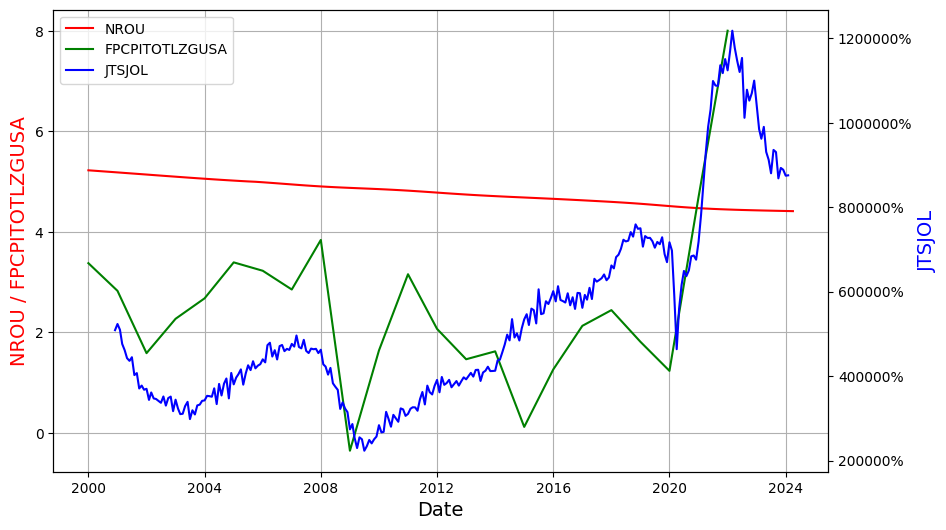

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)

ax.plot(NROU.index, NROU.NROU, color="red", label="NROU")
ax.plot(FPCPITOTLZGUSA.index, FPCPITOTLZGUSA.FPCPITOTLZGUSA, color="green", label="FPCPITOTLZGUSA")

ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(JTSJOL.index, JTSJOL.JTSJOL, color="blue", label="JTSJOL")


ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("NROU / FPCPITOTLZGUSA", color="red", fontsize=14)
ax2.set_ylabel("JTSJOL", color="blue", fontsize=14)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [126]:
# Trailing PE ratio for Tesla
TSLA_dividends = yf.Ticker('TSLA').info
print(TSLA_dividends["trailingPE"])


33.11189


## **QUESTION #7. Time-driven strategy description around earnings releases**
Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

We can select and sort companies that will provide statistical data on their earnings over the next 10 days or 2 weeks. For these companies, we can examine the historical chart of their stock price fluctuations in previous earning release periods, taking into account the statistics that were demonstrated at that point. Depending on the chosen strategy, we can select companies with high volatility in their stock price in either a positive or negative direction, or companies with minimal stock price volatility. Alternatively, we can select only those companies that demonstrate stable earnings (with minimal variation in statistics) and use such companies in our investment strategy. The gathered information should be supplemented with other indicators and their impact on volatility should be studied. The analysis should be complemented with specialized information about the company in question or information about the earnings of other companies in the same sector of the economy.